In [1]:
%pip install scikit-learn
%pip install nltk
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 20.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 19.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
import pandas as pd

In [3]:
stemmer = nltk.stem.SnowballStemmer('spanish')
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
df = pd.read_csv('reviews_filmaffinity.csv', sep='\|\|',
                 header=0, index_col= None, encoding='utf-8')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\|'
<>:1: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipykernel_1118/1315668273.py:1: SyntaxWarning: invalid escape sequence '\|'
  df = pd.read_csv('reviews_filmaffinity.csv', sep='\|\|',
/tmp/ipykernel_1118/1315668273.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('reviews_filmaffinity.csv', sep='\|\|',


,film_name,gender,film_avg_rate,review_rate,review_title,review_text
0,Ocho apellidos vascos,Comedia,"6,0",3.0,OCHO APELLIDOS VASCOS...Y NINGÚN NOMBRE PROPIO,La mayor virtud de esta película es su existen...
1,Ocho apellidos vascos,Comedia,"6,0",2.0,El perro verde,"No soy un experto cinéfilo, pero pocas veces m..."
2,Ocho apellidos vascos,Comedia,"6,0",2.0,Si no eres de comer mierda... no te comas esta...,Si no eres un incondicional del humor estilo T...
3,Ocho apellidos vascos,Comedia,"6,0",2.0,Aida: The movie,"No sé qué está pasando, si la gente se deja ll..."
4,Ocho apellidos vascos,Comedia,"6,0",2.0,UN HOMBRE SOLO (Julio Iglesias 1987),"""Pero cuando amanece,y me quedo solo,siento en..."


In [8]:
df = df[['review_text', 'review_rate']]

df['polaridad'] = df['review_rate'].apply(lambda x: 'positivo' if x > 7 else 'negativo')
df.head()

,review_text,review_rate,polaridad
0,La mayor virtud de esta película es su existen...,3.0,negativo
1,"No soy un experto cinéfilo, pero pocas veces m...",2.0,negativo
2,Si no eres un incondicional del humor estilo T...,2.0,negativo
3,"No sé qué está pasando, si la gente se deja ll...",2.0,negativo
4,"""Pero cuando amanece,y me quedo solo,siento en...",2.0,negativo


In [11]:
print(df.loc[2895].review_text)
print( df.loc[2895].polaridad)

Fui a ver esta película ante la insistencia de mis hijas y cual sería mi sorpresa cuando estuve hora y media riéndome hasta no poder más. Es una comedia original, atrevida, positiva e inspiradora. La moraleja que podemos extraer es que hemos de aprender todos a reírnos mucho más de nosotros mismos y a no tomarnos tan en serio. Así probablemente seriamos bastante más felices, más serenos y más tolerantes. Ir de "dignos" por la vida no trae nada bueno
positivo


Text(30.764506172839504, 0.5, 'Conteo')

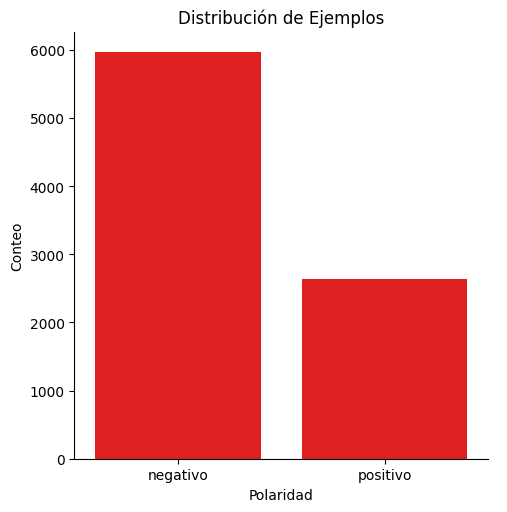

In [12]:
sns.catplot(x='polaridad', kind='count', color='r', data=df)
plt.title('Distribución de Ejemplos')
plt.xlabel('Polaridad')
plt.ylabel('Conteo')

In [13]:
def processing_text(texto):
# Paso 1: Remover con un expresión regular carateres especiales (no␣ ,→palabras).
  processed_feature = re.sub(r'\W', ' ', str(texto))
  # Paso 2: Remover ocurrencias de caracteres individuales
  processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
  processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
  # Paso 3: Remover números (Ocurrencias muy esporádicas en nuestro dataset)
  processed_feature = re.sub(r'[0-9]+', ' ', processed_feature)
  # Paso 4: Simplificar espacios concecutivos a un único espacio entre, palabras
  processed_feature = re.sub(' +', ' ', processed_feature)
   # Paso 5: Pasar todo el texto a minúsculas
  processed_feature = processed_feature.lower()
  processed_feature = " ".join([stemmer.stem(i) for i in processed_feature.split()])
  return processed_feature

In [14]:
texto_para_procesar = df['review_text'].values
labels = df['polaridad'].values


texto_procesado = []
for sentence in range(0, len(texto_para_procesar)):
    procesado = processing_text(texto_para_procesar[sentence])
    texto_procesado.append(procesado)

In [17]:
print("Sin procesar:")
print(texto_para_procesar[2894])
print("---------------------------------")
print("Procesado:")
print(texto_procesado[2894])

Sin procesar:
Una de esas películas que sabe conectar con el público, y que lo consigue gracias a unos personajes en torno a los que se construye el resto de la historia (que en este caso es lo de menos), un tipo de cine muy apropiado para compartir con los amigos o la familia sin más pretensiones que las de disfrutar de una forma sana y divertida, algo aparentemente sencillo pero que muy pocas películas consiguen, y ése es el verdadero valor de esta película.Lo mejor:  Sus personajes protagonistas, gracias a los que se consiguen varios de los mejores momentos de la película.Lo peor:  Quizás haberse excedido en lo que a autosuperación se refiere, y ya de paso, no haberse atrevido a potenciar algo más el componente dramático de la película. www.aluCINEando.com
---------------------------------
Procesado:
una de esas pelicul que sab conect con el public que lo consig graci unos personaj en torn los que se constru el rest de la histori que en este cas es lo de men un tip de cin muy apropi

In [18]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [22]:
vectorizer = CountVectorizer(max_features=2500, stop_words=stopwords.words('spanish'))
texto_features = vectorizer.fit_transform(texto_procesado).toarray()

In [24]:
vectorizer.get_feature_names_out()[:100]

array(['abaj', 'abandon', 'abarc', 'abiert', 'abord', 'abraz', 'abre',
       'absolut', 'absurd', 'abuel', 'abund', 'aburr', 'abus', 'acab',
       'academi', 'acas', 'accident', 'accion', 'acent', 'acept', 'acerc',
       'acert', 'aciert', 'aclar', 'acompañ', 'acontec', 'acord', 'acost',
       'acostumbr', 'actitud', 'acto', 'actor', 'actoral', 'actos',
       'actric', 'actriz', 'actu', 'actuacion', 'actual', 'acud',
       'acuerd', 'acus', 'adapt', 'adecu', 'adel', 'ademas', 'adentr',
       'adivin', 'adjet', 'admir', 'admit', 'adolescent', 'ador', 'adorn',
       'adult', 'aere', 'afan', 'afect', 'aficion', 'afirm', 'afortun',
       'afront', 'agarr', 'agent', 'agil', 'agobi', 'agor', 'agot',
       'agrad', 'agradec', 'agres', 'agu', 'aguant', 'agustin', 'ah',
       'ahi', 'ahor', 'ahorr', 'aid', 'air', 'airbag', 'ajen', 'ajust',
       'alab', 'alard', 'alarg', 'alatr', 'albert', 'alcanc', 'alcanz',
       'alec', 'alegr', 'alej', 'alejandr', 'alemani', 'alex', 'algui',
  

In [25]:
print(texto_features[2895][1:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [2]:
X_train, X_test, y_train, y_test = train_test_split(texto_features, labels,test_size=0.2, random_state=0)
print(X_train, X_test)
nb = MultinomialNB()

nb.fit(X_train, y_train)

NameError: name 'train_test_split' is not defined

In [28]:
predictions = nb.predict(X_test)

In [30]:
print(accuracy_score(y_test, predictions))

0.7640906449738524


In [ ]:
test = "Fue la mejor pelicula que he visto en mi vida"


test_procesado = processing_text(test)


print("PASO 1 procesamiento:" ,test_procesado)



test_bow =vectorizer.transform([test_procesado])


print("PASO 2 representación:" ,test_bow)


clase_test = nb.predict(test_bow)

# print(accuracy_score(y_test, predictions))


print("PASO 3 predecir con el modelo:" ,clase_test)

PASO 1 procesamiento: fue la mejor pelicul que he vist en mi vid
PASO 2 representación: <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (1, 2500)>
  Coords	Values
  (0, 1503)	1
  (0, 1740)	1
  (0, 2451)	1
  (0, 2468)	1
PASO 3 predecir con el modelo: ['positivo']
